In [16]:

!pip install kaggle

In [17]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"sidshukla97","key":"5169460f6ac8d49cc075499a1ce7bee7"}'}

In [18]:
!mkdir -p -/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.


In [19]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

zomato-bangalore-restaurants.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'zomato-bangalore-restaurants.zip'

with ZipFile(file_name , 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [20]:
# import the dataset 
import pandas as pd
df = pd.read_csv('zomato.csv')

# **ABSTRACT**

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is. 

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

Content
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

    • Location of the restaurant
    • Approx Price of food
    • Theme based restaurant or not
    • Which locality of that city serves that cuisines with maximum number of restaurants
    • The needs of people who are striving to get the best cuisine of the neighborhood
    • Is a particular neighborhood famous for its own kind of food.

“Just so that you have a good meal the next time you step out”

The data is accurate to that available on the zomato website until 15 March 2019.
The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

Phase I,

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

Phase II,

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted. See section 5 for more details about the variables.

Acknowledgements
The data scraped was entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..
Source: Kaggle

**Main Objective:**

The main agenda of this project is:

>> Perform extensive **Exploratory Data Analysis(EDA)** on the Zomato Dataset.

>>Build an appropriate **Machine Learning Model** that will help various Zomato Restaurants to predict their respective Ratings based on certain features

>>**DEPLOY** the Machine learning model via **Flask** that can be used to make live predictions of restaurants ratings

A step by step guide is attached to this documnet as well as a video explanation of each concpet.

In [24]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Columns description

1. <b>url </B> contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost**(for two people) contains the approximate cost of meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in**(type) type of meal

17. **listed_in**(**city**) contains the neighborhood in which the restaurant is listed

In [21]:
#dataset topmost values 
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [28]:
df.shape

(51717, 17)

So the dataset has 51717 rows and 17 columns out of which all columns are not useful so we may have to delete the some of the columns

In [29]:
df.dtypes #checking the data types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [30]:
df.isna().sum() #checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

rate , phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people) are the feature which have missing values...dish_liked is missing most values.

In [32]:
# Let's see the null values of the above dataset in terms of the percentage 

print("Checking the Null or na percentage")
((df.isnull() | df.isna()).sum()*100 / df.index.size)

Checking the Null or na percentage


url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

dish_liked is missing 54% of the values after that rate is about 15% etc...

In [33]:
# More info about the data

df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [37]:
#the columns in the dataset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [38]:
#top 10 most url's  in our dataset
df['url'][:10]

0    https://www.zomato.com/bangalore/jalsa-banasha...
1    https://www.zomato.com/bangalore/spice-elephan...
2    https://www.zomato.com/SanchurroBangalore?cont...
3    https://www.zomato.com/bangalore/addhuri-udupi...
4    https://www.zomato.com/bangalore/grand-village...
5    https://www.zomato.com/bangalore/timepass-dinn...
6    https://www.zomato.com/bangalore/rosewood-inte...
7    https://www.zomato.com/bangalore/onesta-banash...
8    https://www.zomato.com/bangalore/penthouse-caf...
9    https://www.zomato.com/bangalore/smacznego-ban...
Name: url, dtype: object

In [39]:
#top 10 address in our dataset
df['address'][:10]

0    942, 21st Main Road, 2nd Stage, Banashankari, ...
1    2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...
2    1112, Next to KIMS Medical College, 17th Cross...
3    1st Floor, Annakuteera, 3rd Stage, Banashankar...
4    10, 3rd Floor, Lakshmi Associates, Gandhi Baza...
5    37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...
6    19/1, New Timberyard Layout, Beside Satellite ...
7    2469, 3rd Floor, 24th Cross, Opposite BDA Comp...
8    1, 30th Main Road, 3rd Stage, Banashankari, Ba...
9    2470, 21 Main Road, 25th Cross, Banashankari, ...
Name: address, dtype: object

In [40]:
#the topmost names in our dataset
df['name'][:10]

0                                              Jalsa
1                                     Spice Elephant
2                                    San Churro Cafe
3                              Addhuri Udupi Bhojana
4                                      Grand Village
5                                    Timepass Dinner
6    Rosewood International Hotel - Bar & Restaurant
7                                             Onesta
8                                     Penthouse Cafe
9                                          Smacznego
Name: name, dtype: object

In [41]:
#the topmost phone in our dataset
df['phone'][:10]

0      080 42297555\r\n+91 9743772233
1                        080 41714161
2                      +91 9663487993
3                      +91 9620009302
4    +91 8026612447\r\n+91 9901210005
5    +91 9980040002\r\n+91 9980063005
6      +91 9731716688\r\n080 26740366
7        080 48653961\r\n080 48655715
8    +91 8884135549\r\n+91 9449449316
9    +91 9945230807\r\n+91 9743804471
Name: phone, dtype: object

In [42]:
df = df.drop(['url', 'phone'] , axis=1)
#dropping unncessary columns 

# Checking for duplicate values

In [44]:
df.duplicated().sum()

43

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.duplicated().sum()

0

In [47]:
#remove the nan values from the dataset
df.dropna(how='any', inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Renaming columes appropriately

In [48]:
#change the columns name 
df = df.rename(columns = {'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [49]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# cleaning the dataset

In [50]:
df['cost'] = df['cost'].apply(lambda x:x.replace(',', ''))
df['cost'] = df['cost'].astype(float)

In [51]:
df['cost'].dtypes

dtype('float64')

In [52]:
print(df['cost'].unique())

print('---'*10)

df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [53]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [54]:
#removing New
df = df.loc[df['rate']!='NEW']

In [55]:
#removing '/5' from rates
df['rate'] = df['rate'].apply(lambda x:x.replace('/5' , ''))

In [56]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [57]:
df['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51705    [('Rated 3.0', "RATED\n  Nice place to hangout...
51707    [('Rated 4.0', 'RATED\n  Went there post dinne...
51708    [('Rated 3.0', 'RATED\n  Place is good not tha...
51711    [('Rated 4.0', 'RATED\n  A fine place to chill...
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
Name: reviews_list, Length: 23248, dtype: object

# Visualisations

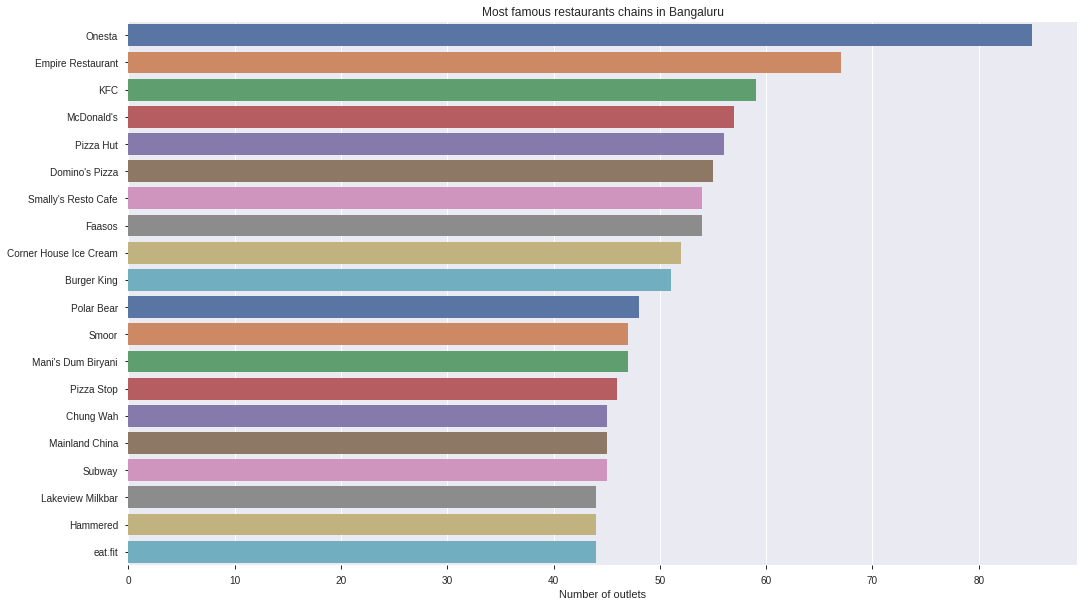

In [60]:
##
%matplotlib inline

plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

In [61]:
df['book_table'].value_counts()

No     17191
Yes     6057
Name: book_table, dtype: int64

In [67]:
plt.style.use('fivethirtyeight')


Text(0.5, 1.0, 'Distribution of book table')

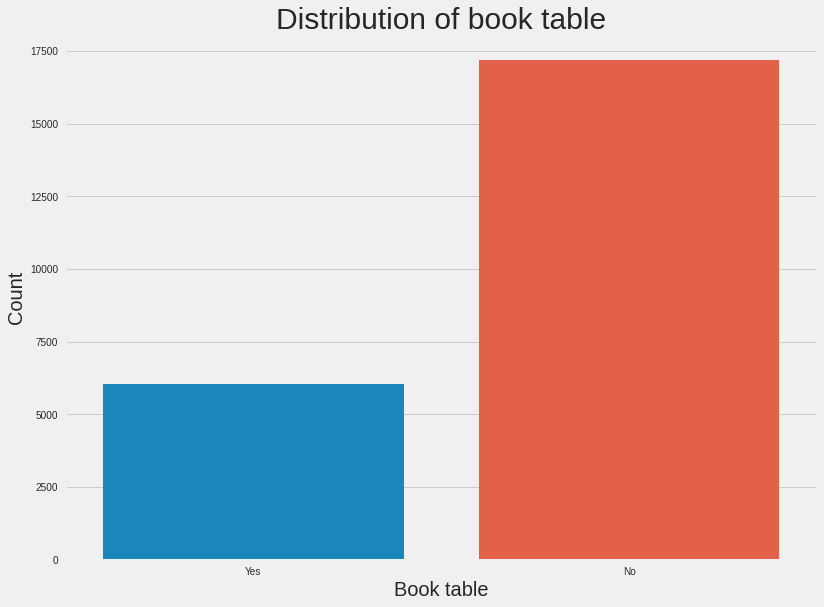

In [68]:
plt.figure(figsize = (12, 9))
sns.countplot(df['book_table'])
plt.xlabel('Book table', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title("Distribution of book table", fontsize=30)

In [69]:
x=df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=2)))
layout=go.Layout(title="Table booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

Most of the Restaurants do not offer table booking

Text(0.5, 1.0, 'Distribution of online orders')

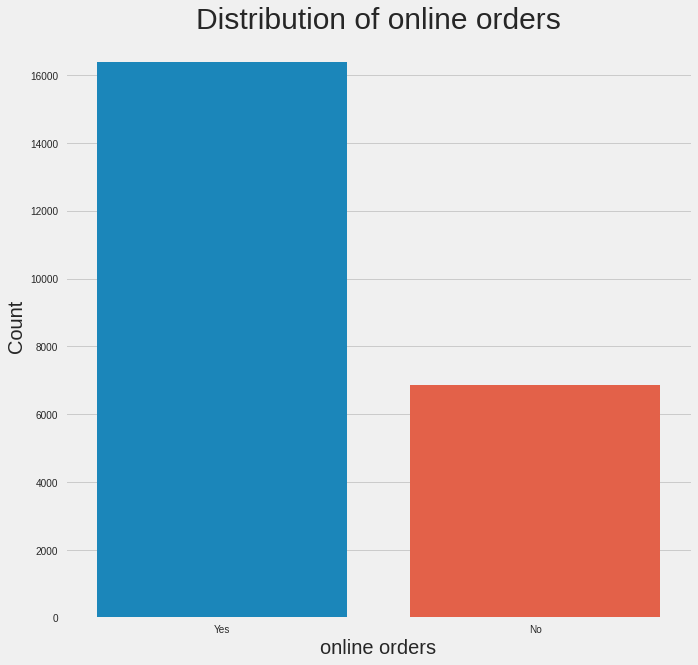

In [70]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(df['online_order'])
plt.xlabel('online orders', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title("Distribution of online orders", fontsize=30)

Most Restaurants offer option for online order and delivery

# Rating Distributions

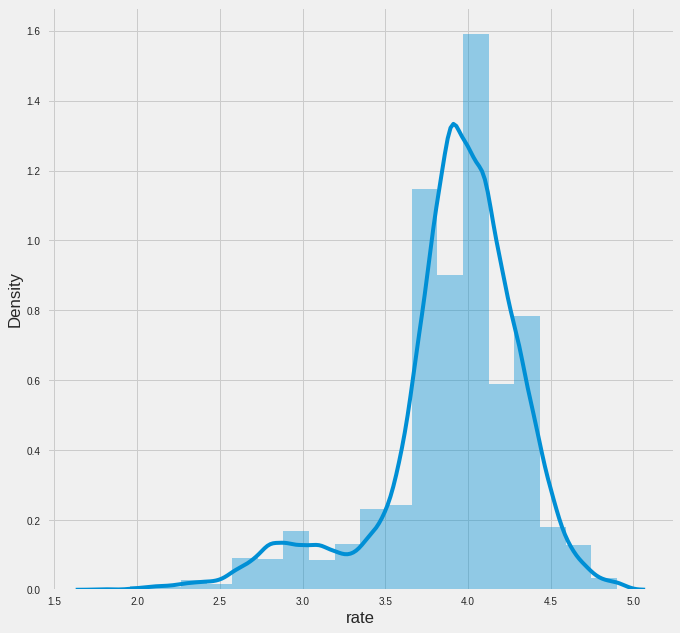

In [71]:
#how rating are distributed
fig = plt.gcf()
fig.set_size_inches(10,10)

sns.distplot(df['rate'], bins=20)

We can infer from above that most of the ratings are within 3.5 and 4.5








Count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"

In [73]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [74]:
df['rate'].min()

'1.8'

In [75]:
df['rate'].max()

'4.9 '

In [76]:
df['rate']=df['rate'].astype(float)


Plotting the counts with the help of pie chart

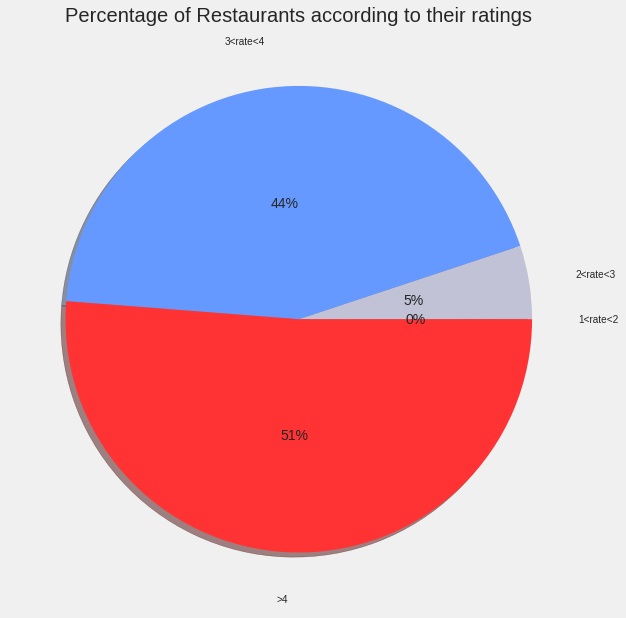

In [77]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(10,10)
plt.show()

# Services Types

Text(0.5, 1.0, 'Type of Service')

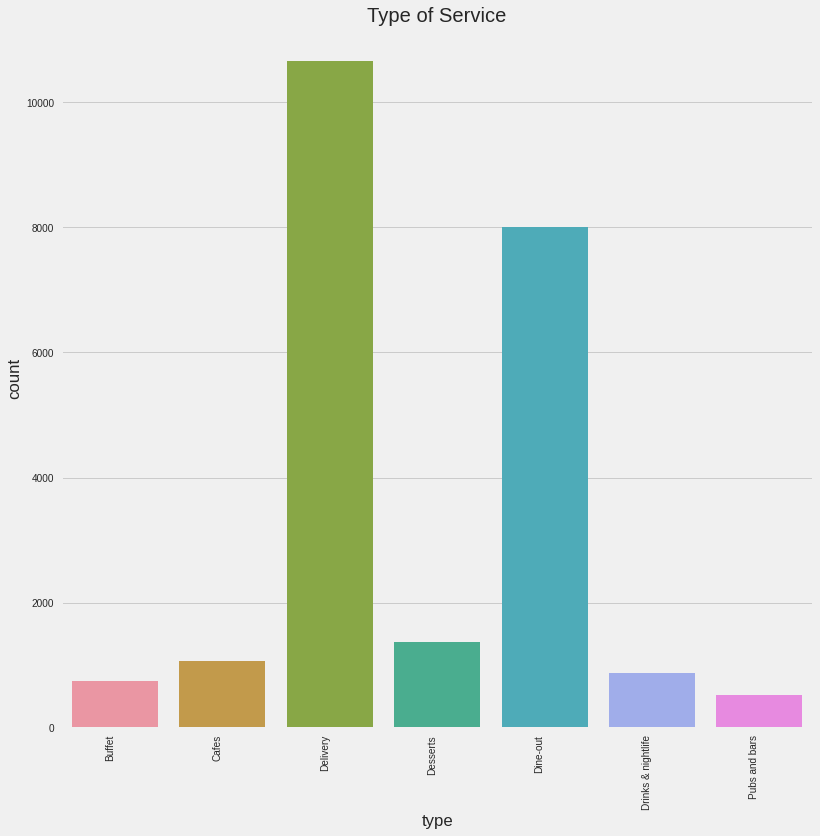

In [78]:
#Types of Services

sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

Here the two main service types are Delivery and Dine-out

# Distribution of Cost of Food for two People

In [79]:
from plotly.offline import iplot



In [80]:
trace0=go.Box(y=df['cost'],name="accepting online orders",
              marker = dict(
        color = 'rgb(113, 10, 100)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=800,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

# Distribution of charges

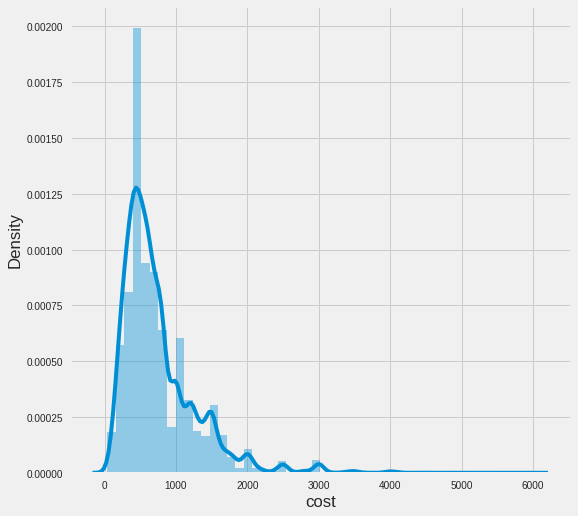

In [81]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

In [82]:
df['dish_liked'][:10]

0     Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1     Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2     Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                           Masala Dosa
4                                   Panipuri, Gol Gappe
5     Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...
7     Farmhouse Pizza, Chocolate Banana, Virgin Moji...
8     Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...
9     Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...
10    Waffles, Pasta, Crispy Chicken, Honey Chilli C...
Name: dish_liked, dtype: object

In [83]:
range(df.shape[0])

range(0, 23248)

In [84]:
import re

df.index = range(df.shape[0])
likes = []
for i in range(df.shape[0]):
    array_split = re.split(',', df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [85]:
df.index = range(df.shape[0])

In [86]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [87]:
print("Count of Most liked dishes in Banglore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Banglore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

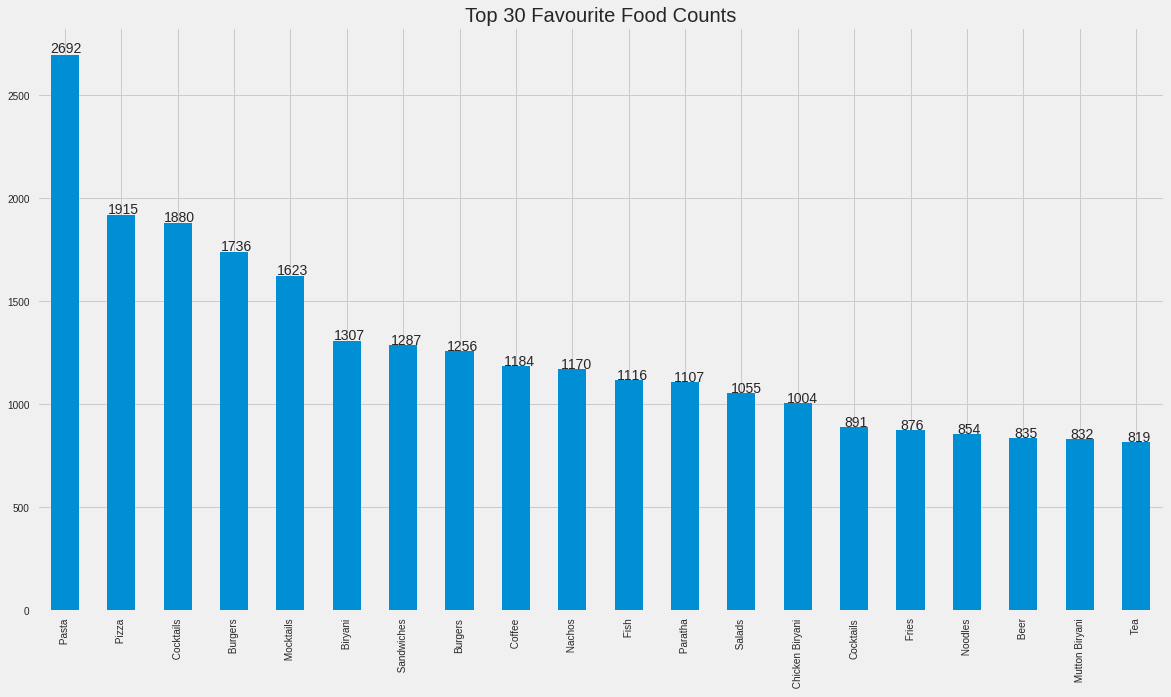

In [88]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar', 
         figsize=(18, 10), title='Top 30 Favourite Food Counts')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x()*1.005, 
            i.get_height()*1.005))

Text(0.5, 0, 'Count')

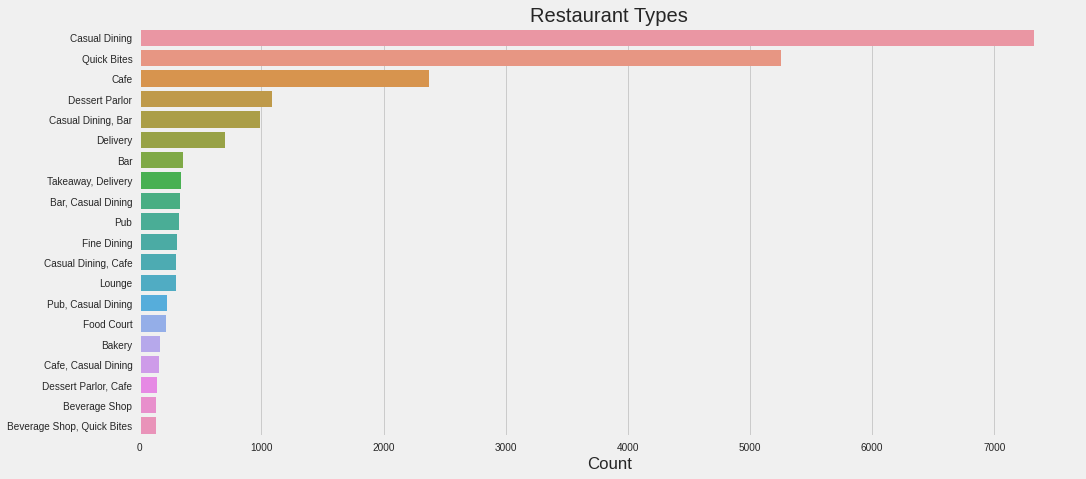

In [89]:
plt.figure(figsize=(15, 7))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(rest, rest.index)
plt.title("Restaurant Types")
plt.xlabel('Count')

Text(0.5, 0, 'Count')

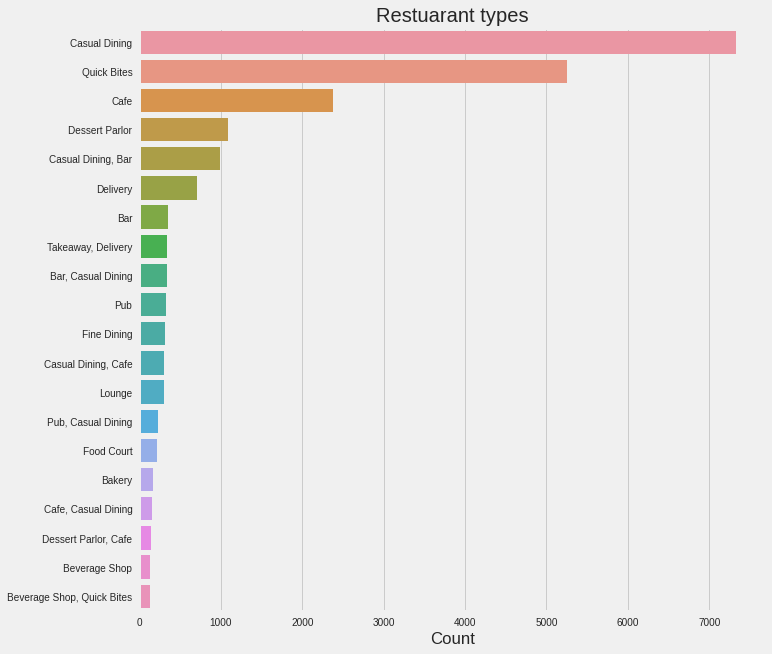

In [90]:
fig = plt.gcf()
fig.set_size_inches(10,10)
rest = df['rest_type'].value_counts()[:20]
sns.barplot(rest, rest.index)
plt.title("Restuarant types")
plt.xlabel('Count')

# Most famous Restaurants

Text(0.5, 0, 'Number of outlets')

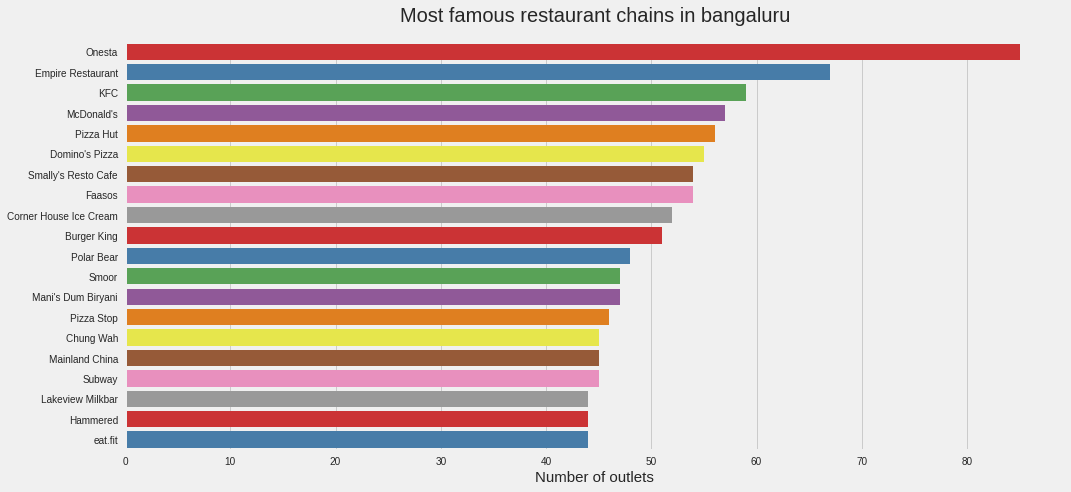

In [91]:
plt.figure(figsize=(15, 7))
chains = df['name'].value_counts()[:20]
sns.barplot(x = chains, y=chains.index, palette='Set1')
plt.title("Most famous restaurant chains in bangaluru", size=20 , pad=20)
plt.xlabel("Number of outlets", size=15)

In [92]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Convert the online categorical variables into a numeric format

In [93]:
df.online_order[df['online_order']== 'Yes'] = 1
df.online_order[df['online_order']== 'No'] = 0

In [94]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [95]:
df.online_order = pd.to_numeric(df.online_order)

# change the string categorical into to a categorical integer

In [96]:
df.book_table[df.book_table=='Yes'] = 1
df.book_table[df.book_table=='No'] = 0

In [97]:
df.book_table = pd.to_numeric(df.book_table)

In [98]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

# Label encode the categorical variables to make it easier to build algorithm

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [100]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [101]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [102]:
data = df.iloc[:, [2,3,4,5,6,7,9,10,12]]

In [103]:
x = df.iloc[:, [2,3,4,5,6,7,9,10,12]]
x.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047


In [104]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                    random_state=10)

In [107]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
from sklearn.metrics import r2_score
y_pred = lr_model.predict(x_test)
r2_score(y_test, y_pred)

1.0

In [115]:
#preparing a decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train , y_train )
y_predict = DTree.predict(x_test)

In [116]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

1.0

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=650, 
                                random_state=245, 
                                min_samples_leaf=.0001)
rf_model.fit(x_train, y_train)
y_predict = rf_model.predict(x_test)
r2_score(y_test, y_predict)

0.9999999312833667

In [111]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
extra_tree_reg=ExtraTreesRegressor(n_estimators = 120)
extra_tree_reg.fit(x_train,y_train)
y_predict=extra_tree_reg.predict(x_test)

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9999997877708058

In [121]:
# Installing the CatBoost

!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 67.3MB 79kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [122]:
from catboost import CatBoostRegressor

#building a catboost regressor model
cbr_model  = CatBoostRegressor(n_estimators = 200, 
                               loss_function = 'MAE', 
                          eval_metric = 'RMSE')


In [123]:
cbr_model.fit(x_train, y_train) #training
y_predict = cbr_model.predict(x_test) # predicting
r2_score(y_test, y_predict) #calculating the r2_score

0:	learn: 0.4300623	total: 54.9ms	remaining: 10.9s
1:	learn: 0.4245445	total: 62ms	remaining: 6.14s
2:	learn: 0.4199805	total: 69ms	remaining: 4.53s
3:	learn: 0.4150936	total: 75.5ms	remaining: 3.7s
4:	learn: 0.4107102	total: 83.7ms	remaining: 3.26s
5:	learn: 0.4064765	total: 89.9ms	remaining: 2.91s
6:	learn: 0.4020184	total: 96.1ms	remaining: 2.65s
7:	learn: 0.3976214	total: 102ms	remaining: 2.45s
8:	learn: 0.3936339	total: 108ms	remaining: 2.3s
9:	learn: 0.3843686	total: 115ms	remaining: 2.18s
10:	learn: 0.3811008	total: 121ms	remaining: 2.08s
11:	learn: 0.3778375	total: 127ms	remaining: 1.99s
12:	learn: 0.3744841	total: 133ms	remaining: 1.91s
13:	learn: 0.3713029	total: 139ms	remaining: 1.84s
14:	learn: 0.3625598	total: 145ms	remaining: 1.79s
15:	learn: 0.3598916	total: 151ms	remaining: 1.74s
16:	learn: 0.3560478	total: 157ms	remaining: 1.69s
17:	learn: 0.3522604	total: 163ms	remaining: 1.65s
18:	learn: 0.3480733	total: 168ms	remaining: 1.6s
19:	learn: 0.3429012	total: 174ms	remaini

0.9951879493294187

In [112]:
import pickle 
#save the model

In [120]:
pickle.dump(extra_tree_reg, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

# Conclusion

With the above implementation it was possible to deliver useful information for Business areas and also for Zomato customers on choosing the best restaurant for ordering (specially the new ones). This is an example of what predictive models can do in practice. This project helps us to gain more insights about the restaurant business.